Đã mở ảnh gốc: exercise\input_image.jpg (Chế độ: RGB)
Đã hoán đổi ngẫu nhiên thứ tự kênh màu RGB.
Ảnh đã hoán đổi kênh được lưu tại: exercise\rgb_swapped_image.png


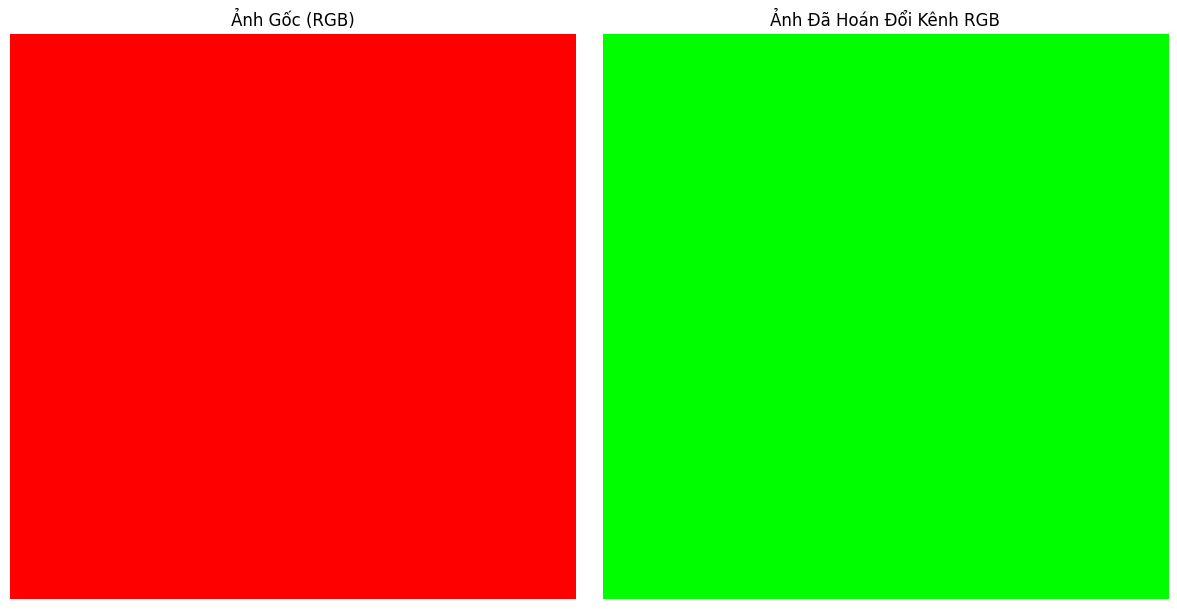

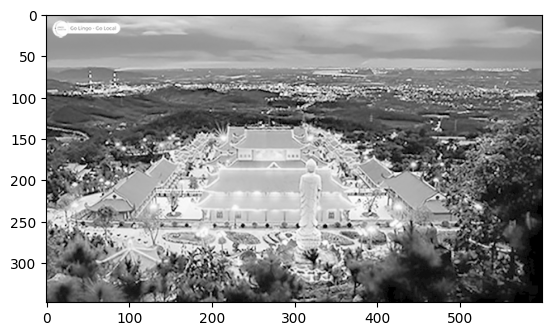

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random # Để chọn ngẫu nhiên hoán vị kênh

# --- Hàm thay đổi thứ tự màu RGB ---

def _swap_rgb_channels(image_pil_rgb):
    """
    Hoán đổi ngẫu nhiên thứ tự các kênh màu RGB của ảnh PIL.
    Trả về ảnh PIL đã hoán đổi kênh.
    """
    # Đảm bảo ảnh là chế độ RGB
    if image_pil_rgb.mode != 'RGB':
        image_pil_rgb = image_pil_rgb.convert('RGB')
    
    # Lấy các kênh R, G, B
    r, g, b = image_pil_rgb.split()
    
    # Tạo tất cả các hoán vị có thể của (r, g, b)
    channel_permutations = [
        (r, g, b), # RGB
        (r, b, g), # RBG
        (g, r, b), # GRB
        (g, b, r), # GBR
        (b, r, g), # BRG
        (b, g, r)  # BGR
    ]
    
    # Chọn ngẫu nhiên một hoán vị
    chosen_permutation = random.choice(channel_permutations)
    
    # Hợp nhất các kênh đã hoán đổi
    swapped_img = Image.merge('RGB', chosen_permutation)
    
    return swapped_img

# --- Phần chính của chương trình ---

def main():
    # Cài đặt đường dẫn và tên file ảnh
    image_dir = 'exercise' # Theo yêu cầu từ các câu trước
    image_filename = 'input_image.jpg' # Giả sử tên file ảnh
    image_path = os.path.join(image_dir, image_filename)

    # Đảm bảo thư mục 'exercise' tồn tại
    os.makedirs(image_dir, exist_ok=True)

    # Kiểm tra và tạo ảnh giả nếu không tìm thấy
    if not os.path.exists(image_path):
        print(f"Lỗi: Không tìm thấy tệp ảnh '{image_filename}' trong thư mục '{image_dir}'.")
        print(f"Đã tạo một ảnh giả lập màu đỏ '{image_filename}' để bạn có thể chạy thử.")
        dummy_img = Image.new('RGB', (200, 200), color = 'red')
        dummy_img.save(image_path)
        # Nếu muốn dừng chương trình nếu không có ảnh:
        # return

    try:
        # Mở ảnh gốc (đảm bảo là ảnh màu RGB)
        img_original_pil = Image.open(image_path)
        if img_original_pil.mode != 'RGB':
            print(f"Cảnh báo: Ảnh '{image_filename}' không ở chế độ RGB. Đã chuyển đổi sang RGB.")
            img_original_pil = img_original_pil.convert('RGB')
        print(f"Đã mở ảnh gốc: {image_path} (Chế độ: {img_original_pil.mode})")

        # Hoán đổi thứ tự màu RGB ngẫu nhiên
        img_swapped_rgb_pil = _swap_rgb_channels(img_original_pil)
        print("Đã hoán đổi ngẫu nhiên thứ tự kênh màu RGB.")
        
        # Lưu ảnh đã biến đổi
        output_filename = "rgb_swapped_image.png"
        output_path = os.path.join(image_dir, output_filename)
        img_swapped_rgb_pil.save(output_path)
        print(f"Ảnh đã hoán đổi kênh được lưu tại: {output_path}")

        # Hiển thị ảnh gốc và ảnh đã hoán đổi kênh
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(img_original_pil)
        plt.title('Ảnh Gốc (RGB)')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(img_swapped_rgb_pil)
        plt.title('Ảnh Đã Hoán Đổi Kênh RGB')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(f"Đã xảy ra lỗi: {e}")

if __name__ == "__main__":
    main()
    from PIL import Image
import math
import scipy # Giữ nguyên import scipy theo hình ảnh, mặc dù không dùng trực tiếp cho gamma correction
import numpy as np
import imageio.v2 as iio # Giữ nguyên import theo hình ảnh
import matplotlib.pyplot as plt
import os # Thêm import os để xử lý đường dẫn file

#open a grayscale image
image_path = 'pagoda.jpg' # Đã thay đổi tên ảnh
try:
    img = Image.open(image_path).convert('L') # Mở ảnh và chuyển đổi sang thang độ xám ('L')
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy tệp ảnh '{image_path}'. Vui lòng đảm bảo tệp ảnh tồn tại.")
    exit()

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#init gamma
gamma = 0.5 # Giá trị gamma mặc định như trong ảnh

#convert ndarray from int to float
b1 = im_1.astype(float)

#find maximum value in b1
b2 = np.max(b1)

#b3 is normalized
# Tránh chia cho 0 nếu b2 (max pixel value) là 0 (ảnh hoàn toàn đen)
if b2 == 0:
    print("Cảnh báo: Ảnh hoàn toàn đen. Không thể thực hiện hiệu chỉnh Gamma. Trả về ảnh gốc.")
    c1 = im_1.astype(np.uint8) # Chuyển ảnh gốc về uint8
else:
    b3 = b1 / b2
    # Tránh log(0) nếu có pixel bằng 0 sau khi chuẩn hóa
    b3[b3 == 0] = 1e-10 # Thay thế 0 bằng một số rất nhỏ để tránh log(0)

    #b2 gamma correction exponent is computed
    # Ở đây, biến 'b2' được tái sử dụng để lưu trữ giá trị mũ gamma, hơi khó hiểu nhưng giữ nguyên theo ảnh
    b2_gamma_exponent = np.log(b3) * gamma

    #gamma correction is computed
    c = np.exp(b2_gamma_exponent) * 255.0

    #c1 is converted to type int
    c1 = c.astype(np.uint8) # Đã sửa thành np.uint8 để tránh lỗi TypeError

d = Image.fromarray(c1)

img.show() # Hiển thị ảnh gốc
d.show()   # Hiển thị ảnh sau gamma correction

plt.imshow(d, cmap='gray') # Thêm cmap='gray' để đảm bảo hiển thị đúng màu xám
plt.show()